In [1]:
!pip install nltk
!pip install -U spacy

     |████████████████████████████████| 10.0MB 8.2MB/s 
     |████████████████████████████████| 2.1MB 47.4MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
!python3 -m spacy download en

     |████████████████████████████████| 12.1MB 778kB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=ebda2da9a844afa8840c52c928206ea9adf4015296d1773e1ad1bbde0a40d1d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-oiw7rd18/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [51]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd '/content/drive/My Drive/DVA_LDA_ALL'

/content/drive/My Drive/DVA_LDA_ALL


In [53]:
!ls

'3226701 Canada, Inc. v. Qualcomm, Inc., Case No.- 15cv2678-MMA (WVG) (S.D. Cal. Oct. 20, 2017).txt'
'381 Search Warrants Directed to Facebook, Inc. v. N.Y. Cnty. Dist. Attorney'\''s Office 29 N.Y.3d 231 (N.Y. 2017).txt'
'A.B.D. v. Comm'\''r of Soc. Sec. CASE NO._ 5_18CV2274 (N.D. Ohio Sep. 17, 2020).txt'
'ABT Sys., LLC v. Research Prods. Corp., No. 1-14-cv-02007 (M.D. Pa. June 14, 2017).txt'
'Acantha LLC v. DePuy Orthopaedics Inc. Case No. 15-C-1257 (E.D. Wis. May. 30, 2018).txt'
'Acharya v. Microsoft Corp. 354 P.3d 908 (Wash. Ct. App. 2015).txt'
'Adair v. State 474 Mich. 1027 (Mich. 2006).txt'
'ADASA Inc. v. Avery Dennison Corp. Case No._ 6_17-cv-01685-MK (D. Or. Apr. 30, 2020).txt'
'Adobe Sys. Inc. v. Wowza Media Sys. Case No. 11-cv-02243-JST (N.D. Cal. Feb. 22, 2014).txt'
'Advanced Micro Devices, Inc. v. LG Elecs., Inc., No. 14-cv-01012-SI (N.D. Cal. July 17, 2017).txt'
'Advantek Mktg., Inc. v. Shanghai Walk-Long Tools Co., 898 F.3d 1210 (Fed. Cir. 2018).txt'
'Ajaxo, Inc. v. E_Trad

In [54]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:

from nltk.tokenize import sent_tokenize

text='This makes the first document. This document made the second document. And this is the third one. Is this the first document?'
sent_tokenize_list = sent_tokenize(text.lower())
print(sent_tokenize_list)
from nltk.tokenize import word_tokenize
word_tokenize_list = word_tokenize('I mice mouse made world. This makes the first document.'.lower())
print(word_tokenize_list)

['this makes the first document.', 'this document made the second document.', 'and this is the third one.', 'is this the first document?']
['i', 'mice', 'mouse', 'made', 'world', '.', 'this', 'makes', 'the', 'first', 'document', '.']


In [56]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')+[u'',u':',u'.',u'"',u'!',u'?',u"'",u","]) 
  
word_tokens = word_tokenize(example_sent) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(word_tokens) 
print(filtered_sentence) 

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


In [57]:
import spacy

In [58]:
import os
files = [f for f in os.listdir('./') if os.path.isfile(f) and f.find('.txt')>=0]
 
for f in files:
  print(f)

Apple, Inc. v. Samsung Elecs. Co. Case No.- 11-CV-01846-LHK (N.D. Cal. Jul. 29, 2012)_LDA.txt
Apple Inc. v. Samsung Elecs. Co. Case No. 11-cv-01846-LHK (N.D. Cal. Feb. 3, 2012)_LDA.txt
Apple, Inc. v. Samsung Elecs. Co. Case No.- 11-CV-01846-LHK (N.D. Cal. Aug. 10, 2012)_LDA.txt
Apple Inc. v. Samsung Elecs. Co. Case No. 11-cv-01846-LHK (PSG) (N.D. Cal. Jan. 9, 2012)_LDA.txt
Apple, Inc. v. Samsung Elecs. Co. Case No.- 11-CV-01846-LHK (N.D. Cal. Dec. 13, 2012)_LDA.txt
Apple, Inc. v. Samsung Elecs. Co. CASE NO. 11-cv-01846-LHK (N.D. Cal. Sep. 1, 2011)_LDA.txt
pple Inc. v. Samsung Elecs. Co. Case No.- 11-CV-01846-LHK (N.D. Cal. Sep. 12, 2011)_LDA.txt
Apple, Inc. v. Samsung Electronics Co., LTD Case No.- C 11-1846 LHK (PSG) (N.D. Cal. Oct. 4, 2011)_LDA.txt
Apple, Inc. v. Samsung Elecs. Co. Case No. 5-11-cv-01846-LHK (PSG) (N.D. Cal. Jan. 29, 2014)_LDA.txt
Apple, Inc. v. Samsung Elecs. Co. Case No.- 11-CV-01846-LHK (N.D. Cal. Jul. 30, 2012)_LDA.txt
Apple Inc. v. Samsung Elecs. Co. Case No.- C

In [59]:
 
from nltk.corpus import stopwords

from tqdm import tqdm
stopWords = set(stopwords.words('english'))
def txt_list(files):
  vector_list=[]
  for name in tqdm(files):
    f = open(name, "r")
    vector_list.append(f.read())
  return vector_list

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import PorterStemmer
import re
from nltk.stem import WordNetLemmatizer
#wordnet_lemmatizer = WordNetLemmatizer()
def remover(data):
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
    data = [re.sub('\s+', ' ', sent) for sent in data]
    data = [re.sub("\'", "", sent) for sent in data]
    return data
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['NOUN','ADJ']):#, 'ADV',  'VERB'
    """https://spacy.io/api/annotation"""
    texts_out = []
    for text in tqdm(texts):
      doc = nlp(" ".join(text.split())) 
      texts_out.append(" ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags]))
    return texts_out 
def preprocess_texts(corpus):
 
    corpus = remover(corpus)
    corpus_lemma = lemmatization(corpus)
    word_tokenize_list = [word_tokenize(cor) for cor in corpus] 
    for i,words in tqdm(enumerate(word_tokenize_list)):
        wordsFiltered = []
        for w in words:
            if re.findall(r'\d+', w)==[]:
                if w not in stop_words:
                    wordsFiltered.append(w)
        word_tokenize_list[i]=' '.join(wordsFiltered) 
    print('remove stop words')
 
 

    #for i,words in enumerate(word_tokenize_list):
    #    word_tokenize_list[i]=' '.join(words) 
    '''
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(word_tokenize_list)
    words=vectorizer.get_feature_names()
    weight=X.toarray()
    '''
    return word_tokenize_list,  corpus_lemma

In [61]:
vector=txt_list(files)

100%|██████████| 1179/1179 [00:01<00:00, 764.73it/s]


In [62]:
ptexts,  ptexts_lemma=preprocess_texts(vector)

100%|██████████| 1179/1179 [05:05<00:00,  3.86it/s]
1179it [00:08, 138.62it/s]

remove stop words


In [63]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
def lda_info(ptexts):
  count = CountVectorizer(stop_words='english', max_df=.1, max_features=10000)
  ptexts=np.asarray(ptexts)
  X = count.fit_transform(ptexts)
  #search_params = {'n_components': [   5,7,10],  'learning_decay': [ .5, .7, .9], 'max_iter': [10, 20],'doc_topic_prior':[0.1,0.0316, 0.01],'topic_word_prior':[0.1,0.0316, 0.01],'learning_method':['batch','online']}
  search_params = {'n_components': [   3, 5],  'learning_decay': [.5, .7], 'learning_method':['online','batch']}
  #lda = LatentDirichletAllocation(n_components=5,random_state=123, learning_method='batch')
  lda = LatentDirichletAllocation()
 
  model = GridSearchCV(lda,  param_grid=search_params,verbose=2, cv=3)
  model.fit(X)

  
  # Best Model
  best_lda_model = model.best_estimator_

  # Model Parameters
  print("Best Model's Params: ", model.best_params_)

  # Log Likelihood Score
  print("Best Log Likelihood Score: ", model.best_score_)

  # Perplexity
  print("Model Perplexity: ", best_lda_model.perplexity(X))
  X_topics = best_lda_model.transform(X)
  return ptexts,X_topics,best_lda_model,count

In [64]:
pd.reset_option('max_columns')

In [65]:
def lda_tsne_visualize(name,files,articles,ptexts,ptexts_lemma,n_top_words,more_clear=False):
 
        ptexts_a,X_topics,lda,count=lda_info(ptexts_lemma)
        # column names
        topicnames = ["Topic" + str(i+1) for i in range(lda.n_components)]

        # index names
        docnames = ["Doc" + str(i+1) for i in range(len(ptexts_a))]
        df_document_topic = pd.DataFrame(np.round(X_topics, 2), columns=topicnames, index=docnames)
        print(df_document_topic)
        if more_clear:
            threshold = 0.5
            _idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
            X_topics = X_topics[_idx]
        
        feature_names = count.get_feature_names()
        topic_word_list=[]
        for topic_idx, topic in enumerate(lda.components_):
            print("Topic %d:" % (topic_idx + 1))
            print(" ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words] ]))
            topic_word_list.append([feature_names[i] for i in topic.argsort()[::-1][:n_top_words]  ])



        print('')
        _lda_keys = []
        for i in range(X_topics.shape[0]):
          _lda_keys.append(X_topics[i].argmax())
        topic_summaries = []
        for topic_idx, topic in enumerate(lda.components_):
            topic_summaries.append(" ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words]  ]))
        statistics=[0]*len(lda.components_) 
        #print(topic_word_list)
        for i,tt in enumerate(ptexts):
          print( 'Doc',i+1)
          print( files[i])
          print('Topic',_lda_keys[i]+1)
          target=topic_word_list[_lda_keys[i]]
          #print( tt)

          try:
            str_list = tt.split() 
          except:
            print(tt)
            tt.split() 
          unique_words =str_list# list( set(str_list) )
          ll_t=[[unique_words.count(tword) for tword in target] for target in topic_word_list]
          for tp,ll in enumerate(ll_t):
            print('this one', ll  ) if _lda_keys[i]==tp else print( ll )
          '''
          display_word_per_line=50 
          k=0
          mt=articles[i]
          wt=mt.split()
          a=display_word_per_line
          while k+a<len(wt): 
            print(' '.join(wt[k:k+a]))
            if k+a>=len(wt):
              print(' '.join(wt[k+a:]))
              break
            k+=display_word_per_line
          ''' 
          print('')
          statistics[_lda_keys[i]]+=1
        print(statistics)
        for topic_idx, topic in enumerate(lda.components_):
            print("Topic %d:" % (topic_idx + 1))
            print(" ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words] ]))
        return lda,count
        


In [33]:
!pip install wordcloud

In [66]:
lda_model,count=lda_tsne_visualize('ptexts',files,vector,ptexts,ptexts_lemma,n_top_words=50,more_clear=False)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] learning_decay=0.5, learning_method=online, n_components=3 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_decay=0.5, learning_method=online, n_components=3, total=   3.7s
[CV] learning_decay=0.5, learning_method=online, n_components=3 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  learning_decay=0.5, learning_method=online, n_components=3, total=   3.3s
[CV] learning_decay=0.5, learning_method=online, n_components=3 ......
[CV]  learning_decay=0.5, learning_method=online, n_components=3, total=   3.5s
[CV] learning_decay=0.5, learning_method=online, n_components=5 ......
[CV]  learning_decay=0.5, learning_method=online, n_components=5, total=   4.7s
[CV] learning_decay=0.5, learning_method=online, n_components=5 ......
[CV]  learning_decay=0.5, learning_method=online, n_components=5, total=   3.9s
[CV] learning_decay=0.5, learning_method=online, n_components=5 ......
[CV]  learning_decay=0.5, learning_method=online, n_components=5, total=   4.0s
[CV] learning_decay=0.5, learning_method=batch, n_components=3 .......
[CV]  learning_decay=0.5, learning_method=batch, n_components=3, total=   4.3s
[CV] learning_decay=0.5, learning_method=batch, n_components=3 .......
[CV]  learning_decay=0.5, learning_method=batch, n_components=3, total=   4.0s
[CV] learning_de

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.6min finished


串流輸出內容已截斷至最後 5000 行。
this one [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Doc 467
Rankine v. Roller Bearing Co. of Am., Inc. Case No. 12cv2065-IEG (BLM) (S.D. Cal. Aug. 5, 2013).txt
Topic 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
this one [0, 0, 0, 35, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Doc 468
Page v. Microsoft Corp. Civil Action No. 4_14-CV-220-O (N.D. Tex. Nov. 18, 2014).txt
Topic 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

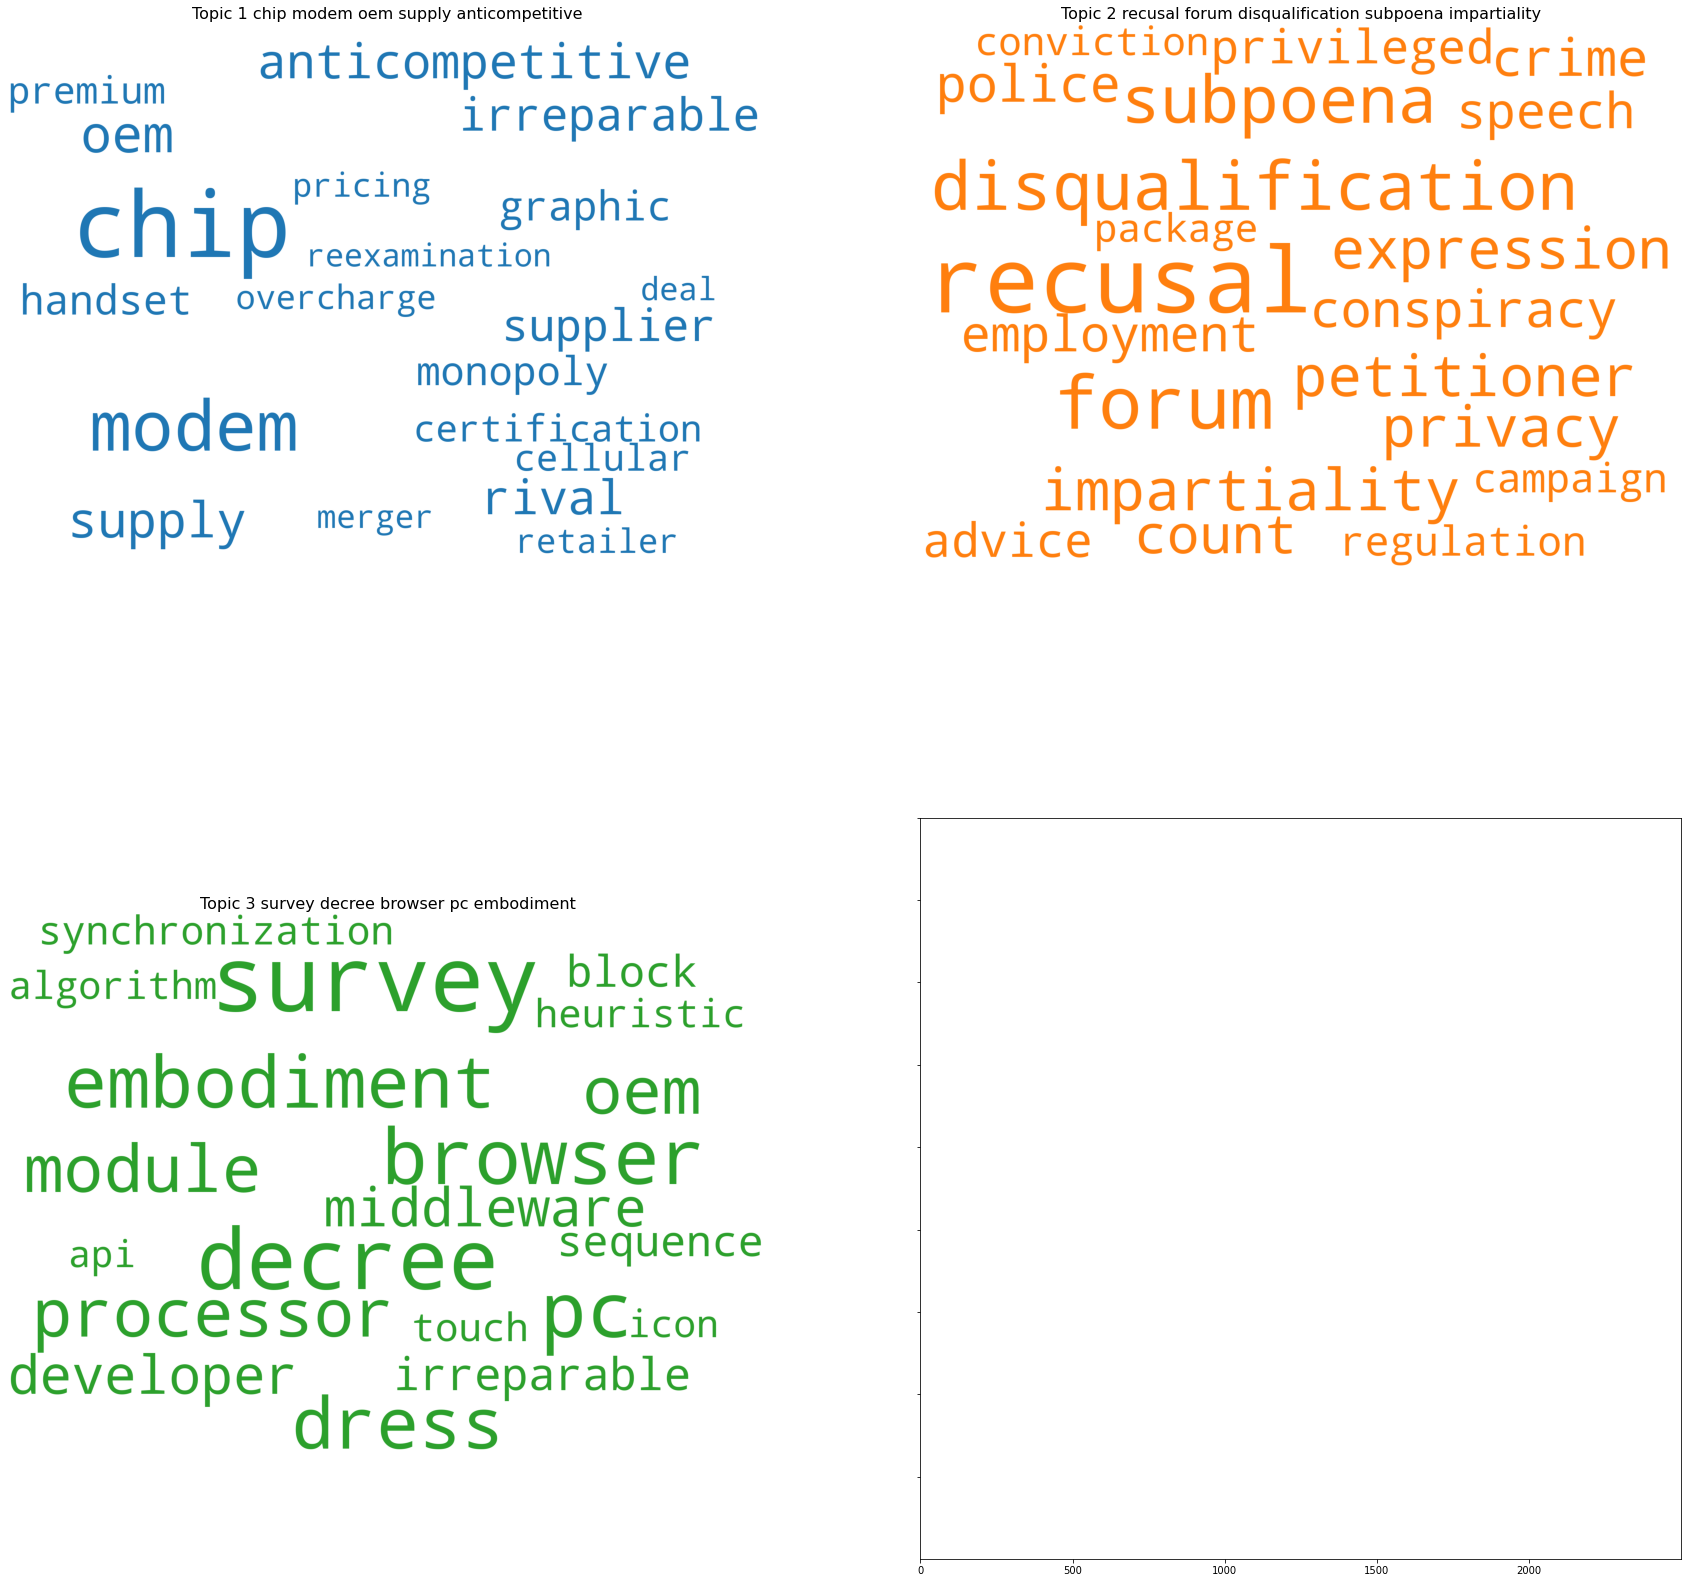

In [67]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

feature_names = count.get_feature_names()

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],#collocations=False,#
                  prefer_horizontal=1.0)


topics =  [  {  feature_names[i]:int(ii*100)  for i,ii in zip(topic.argsort()[::-1],np.sort(topic)[::-1]) } for topic_idx, topic in enumerate(lda_model.components_)]
 
fig, axes = plt.subplots((len(lda_model.components_)+1)//2, 2, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i== len(topics):break
    fig.add_subplot(ax)
    
    topic_words = topics[i] 
 
    #print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1)+' '+" ".join(list(topic_words.keys())[:5]) , fontdict=dict(size=16))
    plt.gca().axis('off')

In [68]:
import pickle

In [69]:
 
pickle.dump(lda_model, open('/content/drive/My Drive/DVA_LDA_ALL/finalized_model.pkl', 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open('/content/drive/My Drive/DVA_LDA_ALL/finalized_model.pkl', 'rb'))

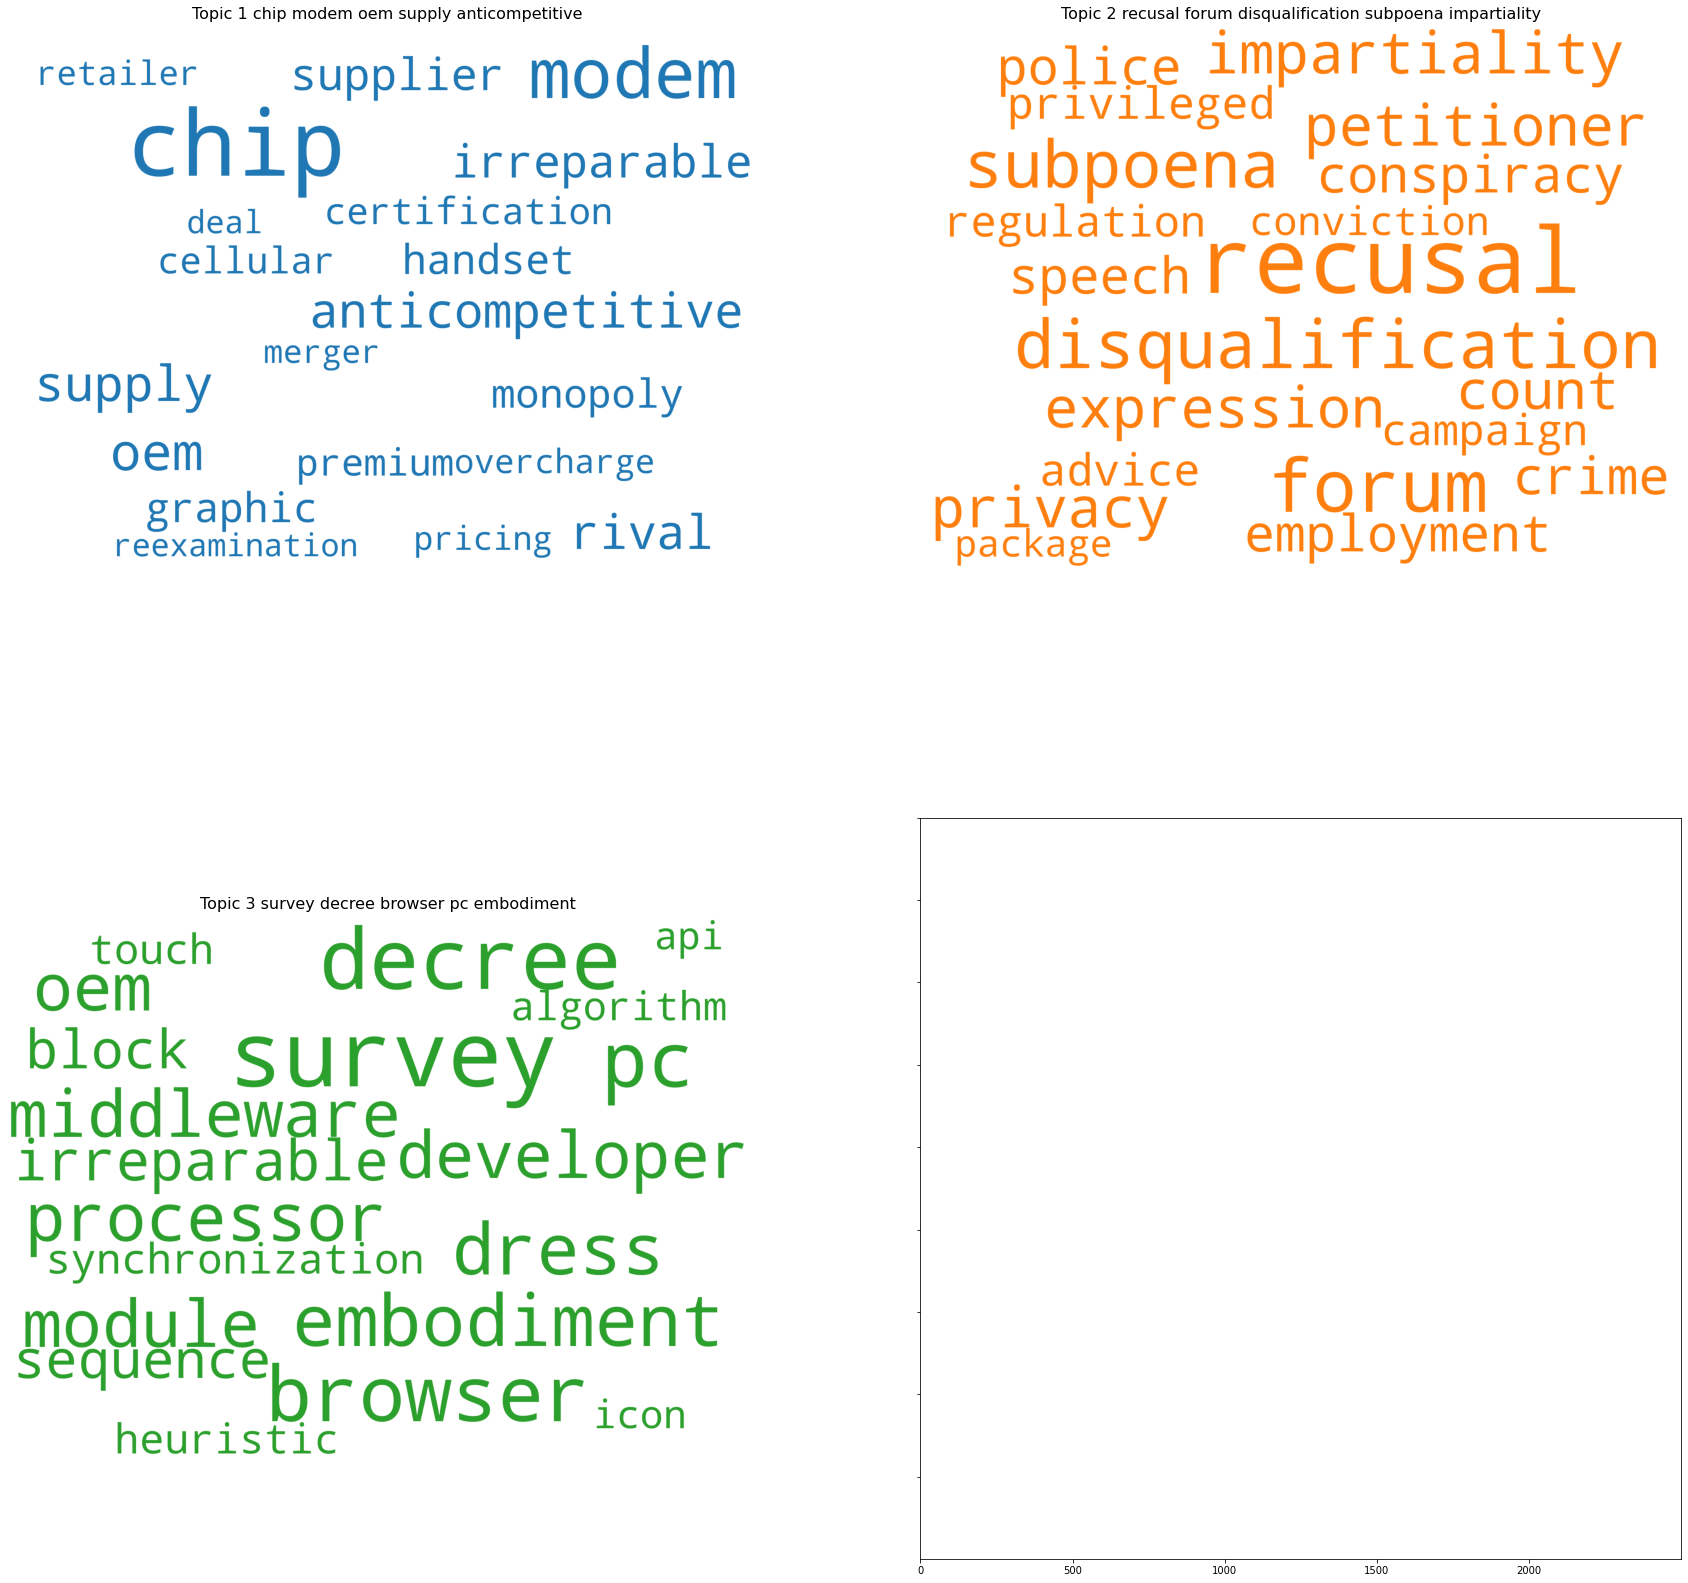

In [70]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

feature_names = count.get_feature_names()

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],#collocations=False,#
                  prefer_horizontal=1.0)


topics =  [  {  feature_names[i]:int(ii*100)  for i,ii in zip(topic.argsort()[::-1],np.sort(topic)[::-1]) } for topic_idx, topic in enumerate(loaded_model.components_)]
 
fig, axes = plt.subplots((len(lda_model.components_)+1)//2, 2, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i== len(topics):break
    fig.add_subplot(ax)
    
    topic_words = topics[i] 
 
    #print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1)+' '+" ".join(list(topic_words.keys())[:5]) , fontdict=dict(size=16))
    plt.gca().axis('off')

In [71]:
def lda_call(best_lda_model,ptexts,count):
  count = CountVectorizer(stop_words='english', max_df=.1, max_features=10000)
  ptexts=np.asarray(ptexts)
  X = count.fit_transform(ptexts)

  # Perplexity
  print("Model Perplexity: ", best_lda_model.perplexity(X))
  X_topics = best_lda_model.transform(X)
  return ptexts,X_topics,best_lda_model 


In [72]:
def lda_returnfiletopics( files, ptexts,ptexts_lemma,n_top_words,lda,count  ):
 
        ptexts_a,X_topics,lda=lda_call(lda,ptexts_lemma,count)
 
 
 
 
        _lda_keys = []
        for i in range(X_topics.shape[0]):
          _lda_keys.append(X_topics[i].argmax())
        file_topic={}
        statistics=[0]*len(lda.components_) 
        #print(topic_word_list)
        for i,tt in enumerate(ptexts):
          '''
          print( 'Doc',i+1)
          print( files[i])
          print('Topic',_lda_keys[i]+1)
          '''
          file_topic[files[i]]=[int(_lda_keys[i]+1),float(np.round(X_topics[i][_lda_keys[i]],2))]
 
          statistics[_lda_keys[i]]+=1
        print(statistics)
        
        return  file_topic  

In [73]:
file_topic_and_topicsdict=lda_returnfiletopics( files, ptexts, ptexts_lemma,  50, loaded_model,count  )
 

Model Perplexity:  2677.4301703618107
[141, 685, 353]


In [74]:

import json
with open('/content/drive/My Drive/DVA_LDA_ALL/file_topic.json', 'w') as output_file:
  json.dump(file_topic_and_topicsdict, output_file, indent=4, sort_keys=True)

In [75]:
 
# saving
with open('/content/drive/My Drive/DVA_LDA_ALL/tokenizer.pkl', 'wb') as handle:
    pickle.dump(count, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [76]:
from nltk import PorterStemmer
import re
from nltk.stem import WordNetLemmatizer
#wordnet_lemmatizer = WordNetLemmatizer()
def remover_t(data):
    data = re.sub('\S*@\S*\s?', '', data) 
    data = re.sub('\s+', ' ', data) 
    data = re.sub("\'", "", data)  
    return data
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatizationer(texts, allowed_postags=['NOUN','ADJ']):#, 'ADV',  'VERB'
    """https://spacy.io/api/annotation"""
 
    texts_out = []
    texts=[texts]
    for text in  texts :
      print(text[0])
      doc = nlp(" ".join(text.split())) 
      texts_out.append(" ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags]))
    return texts_out 

In [77]:
import socket
import numpy as np

print(socket.gethostbyname(socket.gethostname()))

172.28.0.2


In [78]:
from flask import Flask, jsonify, make_response, request
import threading
import pickle
app = Flask(__name__)
padding_size = 1000
model = pickle.load(open('/content/drive/My Drive/DVA_LDA_ALL/finalized_model.pkl', 'rb'))
text_encoder = pickle.load(open('/content/drive/My Drive/DVA_LDA_ALL/tokenizer.pkl', 'rb'))#tfds.features.text.TokenTextEncoder.load_from_file("/content/drive/My Drive/Colab Notebooks/models/sa_encoder.vocab")
print(text_encoder)
print('Model and Vocabalory loaded.......')

@app.route("/")
def hello():
    return "I am alive!"

def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec


def predict_fn(predict_text, pad_size):
    corpus = remover_t(predict_text)
    corpus_lemma = lemmatizationer(corpus)
    corpus_lemma=np.array(corpus_lemma)
    encoded_text = text_encoder.transform(corpus_lemma)
    predictions = model.transform( encoded_text )
    return predictions.argmax()+1


@app.route('/seclassifier', methods=['POST'])
def predict_sentiment():
    text = request.get_json()['text']

    predictions = predict_fn(text, padding_size)
    pred=predictions.tolist()
    return jsonify({'predictions ':pred})

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.1, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
Model and Vocabalory loaded.......


In [82]:
threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':2222}).start()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:2222/ (Press CTRL+C to quit)


In [83]:

import requests
req = requests.get("http://172.28.0.2:2222/")
print(req.status_code)
print(req.text)

172.28.0.2 - - [20/Nov/2020 23:30:23] "GET / HTTP/1.1" 200 -


200
I am alive!


In [85]:
import json
tt='''
ORDER GRANTING IN PART AND DENYING IN PART MOTIONS TO STRIKE PORTIONS OF UPDATED EXPERT REPORTS ON DAMAGES
Re: Dkt. Nos. 3333-3, 3335 Public Redacted Version
Defendants Samsung Electronics Co., Ltd., Samsung Electronics America, Inc., and Samsung Telecommunications America, LLC (collectively, "Samsung") move to strike portions of the November 6, 2015 updated expert report of Julie L. Davis ("Davis's November 2015 Report"), Apple's expert on damages. ECF No. 3335 ("Samsung Mot."). Apple, Inc. ("Apple"), in turn, moves to strike portions of the November 6, 2015 updated expert report of Michael J.  Wagner ("Wagner's November 2015 Report"), Samsung's rebuttal expert on damages. ECF No. 3333-3 ("Apple Mot."). Pursuant to Civil Local Rule 7-1(b), the Court finds most, but not all, of the issues raised in the Motions to Strike suitable for determination without oral argument. The remaining issues will be discussed at the February 11, 2016 hearing. Having considered the parties' submissions, the relevant case law, and the record, for the reasons discussed below, the Court GRANTS IN PART and DENIES IN PART Samsung's Motion to Strike, and GRANTS IN PART and DENIES IN PART Apple's Motion to Strike.
Apple's expert on damages in the 2012 trial was Terry Musika, who passed away in December 2012. Apple then substituted Julie Davis as its expert for the 2013 damages retrial.
I. BACKGROUND
As more than three thousand docket entry filings, two jury trials, and several appeals have already taken place in this case, a brief recitation of the relevant facts is helpful to understand the procedural context in which the parties' motions are made. Apple and Samsung sell competing smartphones and tablets. On April 15, 2011, Apple filed suit against Samsung, asserting numerous intellectual property and antitrust claims. See ECF No. 1. In July and August 2012, after pretrial case narrowing, Apple tried to a jury claims as to three utility patents, four design patents, one registered trade dress, and three unregistered trade dresses against 28 accused Samsung products. See ECF No. 1931. The jury found that 26 of the 28 accused products infringed or diluted one or more of Apple's asserted intellectual property rights and awarded Apple $1,049,343,540 in damages. Id. at 15. Following a multitude of post-trial orders, the Court held a partial damages retrial in November 2013. See ECF No. 2822. The total damages award against Samsung ultimately amounted to $929,780,039. ECF No. 3017.
Samsung filed a Notice of Appeal to the Federal Circuit in March 2014. ECF No. 3018. On May 18, 2015, the Federal Circuit affirmed-in-part, reversed-in-part, vacated-in-part, and remanded this Court's judgment. ECF No. 3271. The Federal Circuit affirmed the validity and infringement judgments with respect to Apple's design and utility patents, and "the damages awarded for the design and utility patent infringements appealed by Samsung." Id., at 4. However, the Federal Circuit reversed "the jury's findings that the asserted trade dresses are protectable" and vacated the damages awards against the Samsung products that were found liable for trade dress dilution. Id. The Federal Circuit remanded "for immediate entry of final judgment on all damages awards not predicated on Apple's trade dress claims and for any further proceedings necessitated by our decision to vacate the jury's verdicts on the unregistered and registered trade dress claims." Id., at 33.
The Federal Circuit's vacatur of the jury's verdicts on trade tress claims required retrial of damages for five Samsung products on remand. Upon receipt of the Federal Circuit's mandate on September 1, 2015, ECF No. 3273, the Court issued a Case Management Order setting retrial for Spring 2016. ECF No. 3272, at 3 ("September 1, 2015 Order"). As it did in connection with the retrial of damages in November 2013, see ECF No. 2316, at 2-3, the Court again ordered that the parties would not be permitted to expand the scope of the damages remand trial:
Pursuant to the Federal Circuit's mandate, on September 18, 2015, this Court also entered partial final judgment against Samsung and in favor of Apple in the amount of $548,176,477 according to the affirmed damages awards for 18 Samsung products. ECF No. 3290. Samsung appealed the Court's entry of partial final judgment to the Federal Circuit on September 21, 2015. ECF No. 3292. The Federal Circuit summarily affirmed this Court's entry of partial final judgment. ECF No. 3319. This Court again received the mandate from the Federal Circuit on December 1, 2015. ECF No. 3321. That partial final judgment has been paid and is not at issue here. ECF No. 3332.
The instant retrial on damages will be the parties' fourth jury trial before this Court, third jury trial in the instant case, and second damages retrial in the instant case. The sole purpose of the instant damages retrial is to determine the amount of damages for the infringement of Apple's '163, '381, '915, D'305, D'677 and/or D'087 Patents by five Samsung products: the Fascinate, Galaxy S4G, Galaxy S Showcase, Mesmerize, and Vibrant.
The Court will not allow substitution of damages experts absent extraordinary circumstances such as Mr. Musika's death after the 2012 jury trial. The Court will not allow supplemental fact discovery. The Court will not permit the parties to expand the scope of the damages retrial and will not allow the parties to rely on new sales data, new products, new methodologies or new theories. . . .
The Court's prior rulings on the parties' Daubert motions, motions in limine, discovery disputes, and evidentiary objections will main in effect as law of the case. The parties may not relitigate these issues.
Each side is limited to one motion to strike, which may not exceed five pages. Each side's opposition shall not exceed five pages. Each side's reply shall not exceed three pages.
Id. at 2-3. Following a case management conference on September 18, 2015, the Court set a final pretrial and trial schedule in a further Case Management Order. ECF No. 3289. The parties' instant Motions to Strike followed.
Apple moves to strike portions of Wagner's November 2015 Report, and Samsung moves to strike portions of Davis's November 2015 Report. In addition to its Motion, Apple filed both an opposition (ECF No. 3345-3, "Apple Opp.") to Samsung's Motion and a Reply (ECF No. 3359-3, "Apple Reply") in support of Apple's Motion. Samsung has similarly filed an opposition (ECF No. 3347-3, "Samsung Opp.") to Apple's Motion and a Reply (ECF No. 3361-3, "Samsung Reply") in support of Samsung's Motion. Additionally, full copies of Wagner's Corrected Expert Report of April 20, 2012 ("Wagner's April 2012 Report"); Wagner's Supplement Expert Report of May 11, 2012 ("Wagner's May 2012 Report"); Wagner's Updated Rebuttal Report of August 26, 2013 ("Wagner's August 2013 Report"); Wagner's Rebuttal Expert Report for Third Trial on Damages of November 6, 2015 ("Wagner's November 2015 Report"); Musika's Expert Report of March 22, 2012 ("Musika's March 2012 Report"); Musika's Supplemental Expert Report of May 8, 2012 ("Musika's May 2012 Report"); Davis's Expert Report of August 23, 2013 ("Davis's August 2013 Report"); and Davis's Updated Expert Report of November 6, 2015 ("Davis's November 2015 Report") are on file with the Court.
II. LEGAL STANDARD
As stated above, this Court's September 1, 2015 Order granted a limited damages retrial on five Samsung products, consistent with the Federal Circuit's mandate. To create a consistent record for appellate review of the 2012 trial, 2013 retrial, and 2016 retrial, the Court has attempted to ensure that the issues and evidence (as they relate to damages) in the 2012 trial, 2013 retrial, and 2016 retrial are substantially the same to the extent fair and feasible. Thus, the parties are not allowed to introduce new evidence in the 2016 retrial. This evidentiary cut-off is set in the interest of fairness to the parties and in light of the need to make efficient use of the Court's limited  resources. While the Court acknowledges that imposing this cut-off inevitably results in the exclusion of some amount of relevant, probative evidence, the Court finds that fairness, efficiency, and the need for a coherent record on appeal outweigh any harm caused by this exclusion for the majority of categories of evidence or new expert opinions the parties now seek to introduce.
Samsung has filed a Motion To Introduce At The Damages Retrial Evidence Created After The July 2012 Trial. ECF No. 3352. That Motion is set for hearing on March 3, 2016 and is not addressed in the instant order.
The Court has broad discretion to manage the conduct of a trial and the evidence presented by the parties—both under the Federal Rules of Evidence, and as part of the Court's inherent authority—and the Court finds that the exercise of this discretion to exclude the parties' experts' reliance on certain evidence is necessary to the efficient management of the 2016 retrial and is in the interests of justice. See, e.g., Fed. R. Evid. 403 (court may exclude relevant evidence, the probative value of which is nevertheless substantially outweighed by "unfair prejudice, confusing the issues, misleading the jury, undue delay, wasting time, or needlessly presenting cumulative evidence"); Navellier v. Sletten, 262 F.3d 923, 941-42 (9th Cir. 2001) (imposing limits on the parties' presentation of evidence is within "the broad discretion that the district court had to manage the trial"); Abbott Labs. v. Brennan, 952 F.2d 1346, 1351 (Fed. Cir. 1991) ("It is improper on appeal to disturb a district court's trial management, absent a clear abuse of judicial discretion."); Beatrice Foods Co. v. New Eng. Printing & Litho. Co., 899 F.2d 1171, 1177 (Fed. Cir. 1990) (per curiam) ("A trial court has broad discretionary authority in managing the litigation before it . . . ."); United States v. Hearst, 563 F.2d 1331, 1349 (9th Cir. 1977) (Federal Rules of Evidence "confer broad discretion on the trial judge to exclude evidence on any of the grounds specified in Rule 403").
In deciding whether to enforce the discovery deadlines, the Court has conducted the balancing required in Federal Rule of Evidence 403. The probative value of certain evidence may be so compelling that it substantially outweighs the remaining Rule 403 factors and justifies a deviation from the existing record. However, in most instances the remaining Rule 403 factors  substantially outweigh the probative value of the evidence sought to be introduced, and deviation from the existing record is not justified. Each of the rulings below is consistent with this Court's balancing of the factors set forth in Rule 403. Moreover, the Federal Circuit affirmed the damages judgment from the 2013 retrial, for which the Court imposed the same evidentiary cutoff. Apple Inc. v. Samsung Elecs. Co., 786 F.3d 983, 1004-05 (Fed. Cir. 2015).
III. SAMSUNG'S MOTION TO STRIKE A. Davis's Opinion on Apple's Capacity
Citing Daubert v. Merrel Dow Pharms., Inc., 509 U.S. 579, 592 (1993), Samsung contends that the updated report of Apple's substitute expert, Julie L. Davis, should be stricken to the extent Davis opines that Apple had sufficient capacity to capture the sales it allegedly lost to Samsung. Samsung Mot., at 1. Specifically, Samsung contends that a large portion of Samsung sales for which Apple seeks lost profits were sales to Verizon customers, but that Davis' opinions are based on insufficient evidence that Apple had capacity to produce enough iPhones to capture those sales. Id., at 1-2. Apple responds that Davis uses "the exact same capacity schedules, methodology, and analysis" used previously and that Samsung has previously challenged various portions of Davis's capacity opinions on Daubert grounds without success. Apple Opp., at 1.
Samsung does not contend that Davis's capacity opinions are based on new data or use methodology that differs from those offered in the previous trials, but instead argues that the data and methodology are no longer reliable for purposes of the third trial in this case. Although the Court permitted the parties to file new expert reports in advance of the March 2016 retrial, the Court made clear—as it did before the 2013 retrial—that it was not granting either side an opportunity to expand the scope of the trial or to re-litigate previously decided issues. As a result, the Court prohibited the parties from relying on "new sales data, new products, new methodologies or new theories." ECF No. 3272, at 2. To help enforce these limitations, the Court permitted each side to file a Motion to Strike portions of the new expert reports that did not conform to this Court's orders, but did not authorize new Daubert motions challenging theories  that have already been litigated. Id., at 3.
Here, Davis relies on the same capacity data used in her 2013 report. Compare ECF No. 3336-2 (Nov. 2015 report), at Exh. 26-S, with ECF No. 2386-2 (Aug. 2013 report), at Exh. 26-S. Indeed, Davis's capacity opinions based on that data were presented to the jury at the 2013 retrial. See ECF No. 2840, at 672:1-676:17; 688:10-13 (Nov. 14, 2013 trial transcript). Because Davis's capacity opinions are not based on new data, methodologies, or theories, Samsung's motion to strike is DENIED.
B. Davis's New Mor-Flo Calculations
Samsung argues that Davis's updated report contains a new Mor-Flo calculation related to her opinion that Apple's damages would be essentially the same if Samsung's Replenish and Galaxy Ace phones were considered non-infringing alternatives. Samsung Mot., at 2-3. In addition, Samsung argues that Davis's opinion should be excluded because it arbitrarily considers only the Replenish and Galaxy Ace phones as noninfringing alternatives for the '915 patent. Id.
Apple does not dispute that Davis has included a new Mor-Flo calculation, but instead contends that Davis did so in response to orders of the Court postdating Davis's earlier report—specifically, the Court's November 7, 2013 Order on Noninfringing Alternatives Based On 2012 Jury's Noninfringement Verdict (ECF No. 2657) and November 10, 2013 Order amending the same (ECF No. 2696, at 9), which in relevant part ruled that Samsung was not barred from presenting evidence of certain noninfringing alternatives for the '915 patent (including the Replenish and Galaxy Ace) based on the 2012 jury's verdict. Apple Opp., at 2-3.
Samsung's motion to strike is GRANTED. Samsung is correct that as a general rule the Court's orders barred the inclusion of new theories in the parties' updated expert reports. Although the Court's noninfringing alternatives orders permitted Samsung's expert to testify during the 2013 retrial as to certain noninfringing alternatives based on the 2012 jury's noninfringement verdict, Samsung's expert's testimony was generally consistent with the non-infringing alternatives opinions he already expressed at the 2012 trial. See ECF No. 2657, at 12 (order stating  that "Wagner testified at the 2012 trial that if the jury found that certain Samsung products did not infringe, then these noninfringing products would represent noninfringing alternatives."); ECF No. 2696, at 9; see also, e.g., ECF No. 1842, at 3038:4-19 (Aug. 16, 2012 Wagner trial testimony); ECF No. 2842, at 1010:5-22 (Nov. 15, 2013 Wagner trial testimony). In contrast, Apple does not identify, and the Court has not located, disclosure in Davis's 2013 expert report of an opinion concerning Apple's market share or damages if other Samsung phones (including the Replenish and Galaxy Ace) were considered noninfringing alternatives for the '915 patent. To the contrary, in the 2013 damages retrial, Davis affirmatively testified that she did not consider the Galaxy Ace a noninfringing alternative for various reasons. ECF No. 2843, at 1187:14-1118:10 (Nov. 18, 2013 trial testimony). Because the Court grants Samsung's Motion to strike, it need not reach Samsung's additional arguments regarding Davis's new Mor-Flo analysis.
C. Davis's Previously Excluded Material
Samsung argues that Davis's updated expert report contains analysis previously stricken by the Court, and which should be again stricken. Samsung Mot., at 5. First, Samsung contends that the final sentence of Paragraph 163 of Davis's updated report, which contains a comparison of Samsung's incremental profit margin with its gross profit margin, should be struck as a new opinion not previously presented by Musika, Apple's original damages expert. Id. Second, Samsung argues that Paragraphs 146-155 of Davis's updated report contain a discussion of the history of Samsung's production of financial data that was previously stricken. Id. The Court addresses each in turn.
With regard to the first of these, Samsung contends that Musika's 2012 reports did not disclose an opinion comparing Samsung's gross profit margin and incremental profit margin in the manner contained in the last sentence of Paragraph 163 of the updated Davis report. As a result, Samsung contends, it should be stricken as violating the Court's orders concerning the scope of the 2016 retrial.
The parties disagree as to whether the Court previously struck the specific sentence at  issue. Regardless of whether the Court's previous order is understood to do so, the Court agrees with Samsung that the incremental profit/gross margin comparison contained in the final sentence of Paragraph 163 of the updated Davis report is an improper new opinion. Tellingly, Apple's Opposition does not cite—and the Court has not located—a statement in the body of Musika's 2012 report or supplemental report comparing Samsung's margins in this manner. In contrast, Musika disclosed opinions using other comparisons, such as incremental profit and operating profit. See, e.g., ECF No. 2517-6, at ¶ 40 (May 8, 2012 Supplemental Expert Report of Terry L. Musika, CPA). Although Apple is correct that the underlying data and calculation of Samsung's gross margin and incremental profit margin were present in Musika's May 2012 Report as Exhibit 50-S, the presence of data from which a comparison may be made is not the same as expressing an opinion regarding that comparison. Cf. ECF No. 2575, at 5 (granting motion to strike and noting that "[w]hether or not Musika had the underlying data necessary to perform the incremental profits calculations Davis now includes in her Report, the fact is that Musika did not perform those calculations (or if he did, he did not include them in his Reports)."). Similarly, although Apple contends that the data contained in Exhibit 50-S was admitted as PX28 in the 2012 trial, Musika's testimony does not involve the specific comparison challenged by Samsung. See ECF No. 1839, at 2057-61 (Aug. 13, 2012 trial testimony). Accordingly, Samsung's Motion to strike the last sentence of Paragraph 163 of Davis's November 6, 2015 expert report is GRANTED.
Second, Samsung argues that the Court previously struck the portion of Davis's 2013 report relating to Samsung's production of financial data. Specifically, like Musika's 2012 report, Davis's 2013 report contained an extensive recitation of Samsung's discovery conduct, including various sanctions orders. Samsung Mot., at 5; see ECF No. 2386-02, ¶¶ 145-155. As it did with Musika, the Court ruled that Davis would not be permitted to testify as to Samsung's discovery conduct and granted Samsung's motion to strike. ECF No. 2575, at 6-7. Although the Court did not permit testimony regarding discovery sanctions, Musika was permitted to testify at trial as to his opinion that Samsung's data was unreliable because it had been produced in multiple versions,  was not willingly produced, and contained mistakes. See, e.g., ECF No. 1839, at 2065:8-11. Similarly, Davis was permitted to testify as to her opinion that Samsung's data was unreliable because it had been produced in multiple versions and contained irregularities. ECF No. 2840, at 701:20-702:18.
In her updated expert report, Davis removes most, but not all, improper references to Samsung's discovery conduct, largely focusing instead on the factual predicates for her opinion that Samsung's financial data was irregular or unreliable. Davis's November 2015 Report ¶¶ 145-155. Consistent with its prior rulings, the Court will not permit testimony regarding Samsung's discovery conduct or sanctions. It will, however, permit testimony regarding irregularity of Samsung's financial data consistent with the opinions already expressed at trial. Accordingly, the Court GRANTS Samsung's motion to strike only the following portions of Davis's updated expert report as unduly prejudicial and of minimal probative value, consistent with the portions previously stricken: Paragraph 147, except the first sentence is not stricken; the fourth bullet of Paragraph 155; and the first sentence of the seventh bullet of Paragraph 155. The Court DENIES Samsung's motion to strike revised Paragraphs 145 through 155 in their entirety.
D. Davis's New Schedules Showing Damages By Patent and By Product
Finally, Samsung contends that Davis includes in her report a series of new schedules and calculations purportedly breaking down Apple's damages by product and by patent. Samsung Mot., at 3. Apple concedes that the schedules and calculations are new, Apple Opp., at 3, but contends that Davis included the new material because the Court stated that it "intends to use a verdict form that requires the jury to quantify damages per product and per patent." ECF No. 3291, at 24:9-10. Samsung further contends that Davis's calculations are presented in a misleading format, Samsung Mot., at 4, which Apple denies, Apple Opp., at 4.
Samsung is correct that the wholesale inclusion of new calculations in the parties' expert reports was not authorized, and Apple will not be permitted to do so unilaterally. As previously stated, however, the Court intends to adopt a jury verdict form requiring the jury to quantify  damages on a per product per patent basis. As a result, the Court will address this issue at the February 11, 2016 hearing.
IV. APPLE'S MOTION TO STRIKE
A. Per-Icon Re-Design Cost
In its October 2013 Order on Motions to Strike, the Court struck an opinion from Wagner's August 2013 report that a reasonable royalty for the D'305 patent could be calculated by multiplying (1) the cost to re-design each icon by (2) the number of infringing icons at issue. ECF No. 2575. The Court struck the opinion because the multiplication constituted a new calculation that was not performed in Wagner's Original Report. Id. The Court did not strike the underlying data used to perform the calculation. Id.
In the instant motion, Apple asks the Court to strike three tables and a portion of Paragraph 423 of Wagner's November 2015 Report that list the total number of icons covered by the D'305 patent in the accused devices and the per-icon cost to design a new icon. Apple Mot. at 1. Apple objects to these elements of Wagner's November 2015 report because the total number of icons covered by the D'305 patent and the per-icon design-around cost are the inputs required to perform the calculation that the Court struck in the October 2013 Order on Motions to Strike. Id. Apple does not dispute that the data contained in the tables and Paragraph 423 were included in Wagner's Original Report. See id.; Apple Reply; see also Wagner's April 2012 Report (stating the number of icons at issue and the cost to redesign an icon). Rather, Apple argues that the three tables and the portion of Paragraph 423 should be struck because including the data on the number of infringing icons and the design-around cost for icons will permit the jury to perform the previously struck multiplication.
However, Wagner's November 2015 report does not multiply the cost to re-design each icon by the number of infringing icons at issue, nor does Wagner's November 2015 Report state that the cost to re-design each icon should be multiplied by the number of infringing icons at issue. Instead, the tables and Paragraph to which Apple objects reformat data previously included in  Wagner's April 2012 Report. The Court will not strike portions of Wagner's November 2015 Report that present data properly included in the report merely because that data could be used to perform a stricken calculation. Accordingly, the Court DENIES Apple's Motion to Strike the portions of Wagner's November 2015 report that relate to the re-design cost for icons and the number of icons covered by the D'305 patent.
Nevertheless, the Court cautions that the Court will not permit Wagner to testify to the previously stricken opinion that a reasonable royalty could be calculated by multiplying the per-icon re-design cost by the number of icons at issue in the accused devices.
B. U.S. Standard Costs
Apple next objects to Wagner's use of U.S. standard costs to evaluate Davis's incremental profitability calculations. However, the calculations using U.S. standard costs that Apple seeks to strike were admitted into evidence in the 2013 retrial as part of Exhibit No. DX952.007. See ECF No. 2789-1 (parties' joint final exhibit list for 2013 retrial). Exhibit No. DX952.007 additionally includes the comparison of the calculations using U.S. standard costs to the incremental profitability calculations performed by Davis. Id. Thus, the entirety of Wagner's opinion regarding U.S. standard costs to which Apple objects was already admitted into evidence in the 2013 retrial.
Moreover, although Apple objected to four of the fourteen pages of Exhibit DX952, Apple did not object to DX952.007, the page containing the calculations Apple now seeks to strike, and DX952.007 was admitted into evidence. See ECF No. 2712 (Apple's objections to pages DX952.03, DX952.04, DX952.05, and DX952.10); ECF No. 2843 at 1139:10-1140:14 (admission of DX952 into evidence, with the exception of pages DX952.03, DX952.04, DX952.05, and DX952.10). Because the calculations using U.S. standard costs were admitted into evidence in the 2013 retrial without objection from Apple, Apple has forfeited its objection to those calculations for the 2016 retrial. Accordingly, Apple's motion to strike Wagner's use of U.S. standard costs is DENIED. 
C. Price Elasticity and Market Segmentation
Apple next moves to strike Wagner's price elasticity and market segmentation analysis. Apple argues that the price elasticity and market segmentation analysis is new because it divides the market based on a average selling price instead of the average selling price Wagner used to divide the market in his 2012 and 2013 reports. On this basis, Apple moves to strike Paragraphs 157 to 171 and Schedules 15.1-3T, 15.3-3T, 15.4-3T, and 15.5-3T of Wagner's November 2015 Report.
With the exception of Paragraph 163, the text of Wagner's price elasticity and market segmentation analysis does not rely upon dividing the market based on a average selling price. In fact, much of Wagner's price elasticity and market segmentation analysis is identical to analyses performed by Wagner in Wagner's April 2012 and August 2013 Reports. With the exception of collecting an apparent error in Wagner's August 2013 Repoit that Apple does not identify as a basis for striking Paragraph 157, the substance of Paragraph 157 of Wagner's November 2015 Report is identical to Paragraph 185 of Wagner's August 2013 Repoit. The substance of Paragraphs 158 through 160, 162, and 164 through 166 of Wagner's November 2015 Report is identical both to Paragraphs 186 through 188, 191, and 194 through 196 of Wagner's August 2013 Report and to Paragraphs 195 through 197, 199, and 202 through 204 of Wagner's April 2012 Report. The substance of Paragraph 161 of Wagner's November 2015 Report is identical to Paragraph 198 of Wagner's April 2012 Report. Thus, the opinions in Paragraphs 157 to 162 and Paragraphs 164 to 166 of Wagner's November 2015 Report were all previously disclosed and are not new.
Wagner's August 2013 Report mistakenly states that ( $348.01) = and reports that Apple's prices are accordingly than Samsung's. Wagner's November 2015 Report corrects this to state that ( S348.01) = and reports that Apple's prices are correspondingly than Samsung's. --------
Additionally, no part of the analysis contained in Paragraphs 167 through 171 and Schedules 15.1-3T and 15.3-3T through 15.5-3T of Wagner's November 2015 Report relies upon dividing the market by a average selling price. Instead, the analysis in this portion of  Wagner's November 2015 Report conducts a focused analysis based on the specific products at issue in the 2016 retrial, without drawing upon the average selling price segmentation. Apple does not argue that Samsung's focus on the products at issue in the retrial is grounds to strike this portion of Wagner's November 2015 Report. Apple also does not argue that Paragraphs 167 through 171 of Wagner's November 2015 Report rely upon new data. Instead, Apple objects to Paragraphs 167 through 171 of Wagner's November 2015 Report only based on Wagner's segmentation of the market using a average selling price. However, Paragraphs 167 to 171 of Wagner's November 2015 Report do not mention or rely upon segmenting the market based on a average selling price. Therefore, Paragraphs 167 to 171 do not include new market segmentation analysis, so the Court will not strike Paragraphs 167 to 171.
However, as to Paragraph 163 and Figure 23 of Wagner's November 2015 Report, Wagner does perform a comparative analysis of the accused products to Apple's products by segmenting the market for phones using an average selling price of . Wagner did not segment the market based on a average selling price in any of Wagner's prior expert reports. Instead, Wagner previously segmented the market based on a average selling price, even when Samsung phones with an average selling price exceeding were at issue. See Wagner's August 2013 Report ¶ 192 (segmenting the market based on a average selling price, even though 58% of the accused phones had average selling prices exceeding ); Wagner's April 2012 Report ¶ 200 (segmenting the market based on a average selling price, even though 70% of the accused phones had average selling prices exceeding ). Therefore, Wagner's segmentation of the market using a average selling price in Paragraph 163 of Wagner's November 2015 Report is new. Moreover, because Wagner had not previously segmented the market based on a average selling price even when as many as 70% of the phones at issue had average selling prices exceeding , Wagner's segmentation of the market based on a average selling price is not merely, as Samsung claims, a focusing of Wagner's analysis based on the products at issue in the instant retrial. 
Accordingly, the Court GRANTS Apple's motion to strike as to Paragraph 163 and Figure 23 of Wagner's November 2015 Report. Apple's motion to strike the remainder of the price elasticity and market segmentation analysis in Wagner's November 2015 Report is DENIED.
D. Non-Infringing Alternatives for the D'087 Patent
Apple moves to strike Wagner's opinion that five Samsung phones not subject to the 2016 retrial should be considered as non-infringing alternatives for the D'087 patent. These five phones—the Galaxy S II (AT&T), the Galaxy S II (i9100), the Galaxy S II (Epic 4G Touch), the Galaxy S II (Skyrocket), and the Infuse 4G—were all accused of infringing the D'087 patent at the 2012 trial. At the 2012 trial, the jury found that all five phones did not infringe the D'087 patent but did infringe other Apple's patents.
Apple raises two objections to Wagner's use of these five Samsung phones: (1) that Wagner's April 2012 Report did not "offer the opinion that products accused of infringing the D'087 patent, if found not to infringe, would be non-infringing alternatives to products that did infringe the D'087;" and (2) that, under Astrazeneca AB v. Apotex Corp., 782 F.3d 1324 (Fed. Cir. 2015), products that infringe other patents not at issue cannot serve as available non-infringing alternatives to the patent at issue. Apple Mot. at 3-4. The Court addresses each argument in turn.
Regarding Wagner's failure to disclose the use of products found not to infringe as non-infringing alternatives, Apple raised the same objection in Apple's Motion to Strike Wagner's August 2013 Report. There, Apple argued that the Court should strike "Wagner's opinions that Samsung products found not to infringe Apple's patents could serve as noninfringing alternatives for purposes of a damages analysis" on the basis that such opinions "were not timely disclosed in Wagner's 2012 expert reports." ECF No. 2657 at 12. The Court rejected Apple's argument because "Wagner testified at the 2012 trial that if the jury found that certain Samsung products did not infringe, then these noninfringing products would represent noninfringing alternatives." Id. (citing Trial Trans. August 16, 2012 at 3038:4-19). Because Apple did not object to Wagner's testimony at trial, the Court held that Apple forfeited its objection to Wagner's failure to disclose  his theory on non-infringing alternatives. Id. Accordingly, the Court permitted Wagner to testify at the 2013 retrial that products accused of infringing multiple Apple patents should be considered non-infringing alternatives to patents those products were found not to infringe. Id.; see also ECF No. 2696 at 9 (amending ECF No. 2657 to permit Wagner to testify regarding additional products at trial). The Court's order was not limited to products found not to infringe any patents, and the Court allowed Wagner to testify that products found to infringe some Apple patents should nevertheless be considered non-infringing alternatives to other patents. ECF Nos. 2657, 2696. Thus, pursuant to the Court's previous ruling on Apple's objection to Wagner's failure to disclose the use of Samsung products found not to infringe as non-infringing alternatives, the Court again finds that Apple has forfeited its objection based on Wagner's alleged failure to disclose Wagner's opinion on non-infringing alternatives. See ECF No. 3272 ("The Court's prior rulings on the parties' Daubert motions, motions in limine, discovery disputes, and evidentiary objections will remain in effect as law of the case.").
Although Apple cites to Astrazeneca, the Court does not agree that Astrazeneca broadly stands for the proposition that a product can never be used to show the availability of a noninfringing alternative to a given patent merely because it infringes other patents. In Astrazeneca, the district court made a finding of fact following a bench trial regarding patents covering a pharmaceutical. 782 F.3d at 1330. Specifically, the district court found that a third party's product (which was covered by patents owned by that third party) was not "available" as a non-infringing alternative to the plaintiff's patent. Id. at 1340. Because the acceptability of non-infringing alternatives is ultimately a finding of fact, see, e.g., ECF No. 2657, at 5-6 (citing Standard Havens Prods., Inc. v. Gencor Indus., Inc., 953 F.2d 1360, 1373 (Fed. Cir. 1991)), the Federal Circuit reviewed the district court's finding on the availability of a non-infringing alternative for clear error. Astrazeneca, 782 F.3d at 1341. The Federal Circuit concluded that the district court could have reasonably inferred that the third party's patents would have prevented the defendant from using the third party's formulation of the pharmaceutical as a non-infringing alternative. Id. at 1340-41. Thus, the Federal Circuit held that the district court did not clearly err in its finding of fact regarding the availability of a non-infringing alternative. Id. The Federal Circuit did not hold, as Apple urges the Court to do in the instant case, that products covered by patents other than the one for which damages are sought cannot, as a matter of law, be evidence of available non-infringing alternatives. See generally Astrazeneca, 782 F.3d 1324.
Moreover, in ruling on Apple's motion to strike Wagner's August 2013 report in advance of the 2013 retrial, this Court previously concluded that Samsung could introduce products found to infringe certain Apple patents as evidence of available non-infringing alternatives to other Apple patents not infringed by those products. ECF No. 2657 (November 7, 2013 order on non-infringing alternatives). The judgment from the 2013 retrial in which that ruling was made was, in relevant part, affirmed by the Federal Circuit. Apple, 786 F.3d at 1004-05. The Federal Circuit's opinion in the instant case was issued in May 2015, a month after the Federal Circuit's decision in Astrazeneca, which was issued in April 2015. Thus, the Federal Circuit affirmed this Court's ruling on the availability of non-infringing alternatives in the 2013 retrial, after issuing Astrazeneca.
Indeed, as this Court has previously held, Samsung does not necessarily need to show that any non-infringing alternatives were actually on the market at the time of infringement in order for Samsung to show that there were acceptable non-infringing alternatives available. See ECF No. 2657 at 9 (November 7, 2013 order on non-infringing alternatives). Rather, Samsung is entitled to demonstrate that an acceptable non-infringing alternative was "available," even if it was not actually being sold at the time of infringement. See, e.g., Grain Processing Corp. v. Am. Maize-Prods. Co., 185 F.3d 1341, 1351-52 (Fed. Cir. 1999); TQP Dev., LLC v. Merrill Lynch & Co., No. 08-471, 2012 WL 3283354, at *1 (E.D. Tex. Aug. 10, 2012) ("In determining whether the alternative product is available, the court may consider whether (1) the defendant could readily obtain all of the material needed to implement the non-infringing alternative; (2) the non-infringing alternative was well known in the field at the time of infringement; and (3) the  defendant had all of the necessary equipment, know-how, and experience to use the non-infringing alternative."). Because an acceptable non-infringing alternative need not be a product that was actually on the market at the time of infringement, the fact that the Samsung products infringed some of Apple's patents does not preclude Samsung from arguing that the non-infringing aspects of these products provide evidence that Samsung could have offered a fully non-infringing product that would have been an acceptable non-infringing alternative. Thus, the Federal Circuit's holding in Astrazeneca cannot be read more broadly than affirming the district court's factual finding that a non-infringing alternative was unavailable on the facts in that case. Accordingly, the Court rejects Apple's contention that Astrazeneca bars Samsung from presenting evidence of non-infringing alternatives based on the 2012 jury's non-infringement verdict at the 2016 retrial as a matter of law.
Therefore, Apple's motion to strike Wagner's opinion that five Samsung products found not to infringe the D'087 should be considered as evidence of non-infringing alternatives to the D'087 patent is DENIED.
E. Previously Uncited Product Reviews
Apple moves to strike Wagner's quotation of and citation to several previously uncited product reviews in Paragraph 172 of Wagner's November 2015 Report. Samsung does not dispute that these product reviews were not cited in any of Wagner's prior reports. Instead, Samsung argues that the product reviews should not be struck because Wagner's inclusion of the product reviews "merely elaborat[es] on his prior opinions to focus on the products at issue in the current retrial." Samsung Opp. at 4 (citing ECF No. 2575). The Court has ordered that the parties may not rely upon new data. ECF No. 3272. Therefore, because the product reviews cited in Paragraph 172 are new data included for the first time in Wagner's November 2015 Report, Apple's motion to strike the portions of Paragraph 172 that quote or cite the product reviews is GRANTED.
F. Previously Excluded Opinions
Finally, Apple moves to strike portions of Wagner's November 2015 Report that discuss  (1) the Apple/HTC settlement agreement and (2) the '915 patent invalidity proceedings, as well as (3) the Appendix to Wagner's November 2015 Report that purports to respond to opinions in Davis's prior report that were excluded. Apple moves to strike all of these portions of Wagner's November 2015 Report on the basis that the Court has previously stricken these opinions from Wagner's August 2013 Report. The Court addresses each category of opinions separately.
As to the Apple/HTC settlement agreement, on November 7, 2013, the Court granted Apple's motion to strike Wagner's opinions related to the HTC Agreement from Wagner's August 2013 Report and held that "[n]o party may rely on the HTC Agreement in the retrial unless Apple elicits testimony or makes arguments that it has or would not license the '381, '915, or '163 patents." ECF No. 2667. In opposition to Apple's instant motion to strike, Samsung argues that the Court should not strike Wagner's renewed discussion of the HTC Agreement from Wagner's November 2015 Report because Davis's November 2015 Report contains opinions that may lead Davis to testify at trial that Apple would not license the '381, '915, or '163 patents. Samsung Opp. at 4. For example, Davis states that "Apple currently maintains a list of patents that it is unwilling to license to other companies. This list includes all of the Remand Trial Patents." Davis's November 2015 Report ¶ 205. As the Court previously held, "it would be unjust to allow Apple to suggest to the jury that it has never or would never license its utility patents when in fact it appears to have included at least two of the utility patents-in-suit in the HTC Agreement." ECF No. 2667 at 10. Notwithstanding the potential probative value of the HTC Agreement, the Court ultimately granted Apple's motion to strike Wagner's discussion of the HTC Agreement under Rule 403 on the condition that "Samsung will be allowed to introduce the HTC Agreement and Wagner's analysis of it solely to rebut any testimony or argument by Apple that Apple has never or would never license the utility patents-in-suit." Id. at 11. This Court's previous evidentiary ruling regarding the HTC Agreement remains in effect as the law of the case. See ECF No. 3272 ("The Court's prior rulings on the parties' Daubert motions, motions in limine, discovery disputes, and evidentiary objections will remain in effect as law of the case."). Thus, pursuant to the Court's  prior ruling excluding the HTC Agreement, the Court GRANTS Apple's motion to exclude Wagner's opinions regarding the HTC Agreement. See ECF No. 2667 (Order conditionally granting Apple's motion to strike the HTC Agreement from Wagner's August 2013 Report). Consistent with the Court's prior evidentiary ruling on the HTC Agreement, no party may rely on the HTC Agreement in the instant retrial unless Apple elicits testimony or makes arguments that it has not or would not license the '381, '915, or '163 patents. Id.
As to evidence regarding the '915 patent invalidity proceedings, Samsung concedes that "Mr. Wagner's discussion of the status of the '915 patent reexam in footnotes 401 and 751 to his report is intended only to reserve the right to modify his damages opinions in the event the Court finds the patent invalid based on the Patent Trial and Appeal Board's final rejection of the claims as invalid." Samsung Opp. at 5 n.2. Samsung does not dispute that Wagner's opinions based on the '915 patent invalidity proceedings were not included in Wagner's August 2013 Report because the '915 invalidity proceedings postdated the 2012 trial. See ECF No. 2575 at 12 (the Court's October 22, 2013 Order, inter alia, granting Apple's motion to strike Wagner's opinions based on the patent reexamination proceedings). Thus, Wagner's opinions based on the '915 patent invalidity proceedings are new for purposes of the 2016 retrial, and the Court GRANTS Apple's motion to exclude Wagner's opinions regarding the '915 patent invalidity proceedings.
As to the Appendix to Wagner's November 2015 Report, Wagner acknowledges in the Appendix that the opinions in the Appendix are relevant only if Davis's November 2015 Report contains material previously excluded by the Court. See Wagner's November 2015 Report at A-1 ¶ 1 ("Unless otherwise noted, these sections are only relevant if Ms. Davis does not abide by the Court's orders."). In opposition, Samsung argues that only two sections of Wagner's Appendix should not be stricken. Samsung Opp. at 5. Specifically, Samsung argues that the following two opinions are necessary to rebut Davis's November 2015 Report: (1) Wagner's opinion responding to Davis's comparison of Samsung's incremental profit margin to Samsung's gross profit margin; and (2) Wagner's opinion corresponding to Davis's irreparable harm opinion contained in  Paragraphs 128A-C of Davis's November 2015 Report. Id.
As to the incremental profit margin comparison, the Court has granted Samsung's motion to strike Davis's incremental profit margin comparison. Therefore, the corresponding portions of Wagner's Appendix are not necessary to rebut Davis's opinions. As to the discussion of irreparable harm, Wagner states in the Appendix to Wagner's November 2015 Report that the irreparable harm analysis is relevant only to rebut the irreparable harm analysis in Davis's November 2015 Report. Samsung, in its Opposition, concedes that Wagner's irreparable harm analysis is relevant only if the Court does not exclude Davis's irreparable harm analysis, contained in Paragraphs 128A-C of Davis's November 2015 Report. Samsung Opp. at 5.
In 2013, the Court struck all discussion of irreparable harm from the Davis report because the parties agreed that the irreparable harm opinions were relevant only to the issue of whether to grant a permanent injunction and so were not relevant to the retrial. ECF No. 2575 at 7-8. The Court has since denied Apple's motion for a permanent injunction in this case, and Apple has not appealed that denial. ECF No. 3015. Thus, irreparable harm is not relevant to the instant damages retrial. Accordingly, the Court STRIKES Paragraphs 128A-C of Davis's November 2015 Report. The Court GRANTS Apple's motion to strike the Appendix of Wagner's November 2015 Report.
V. CONCLUSION
In accordance with the analysis set forth above, the Court rules as follows:
1. Samsung's motion to strike Davis's opinions regarding Apple's capacity is DENIED.
2. Samsung's motion to strike Davis's Mor-Flo calculations is GRANTED.
3. Samsung's motion to strike previously excluded opinions in Davis's November 2015 Report is GRANTED IN PART and DENIED IN PART.
4. Apple's motion to strike Wagner's opinions showing per-icon re-design cost is DENIED.
5. Apple's motion to strike Wagner's opinion regarding U.S. standard costs is
DENIED.
6. Apple's motion to strike Wagner's opinion regarding price elasticity and market segmentation is GRANTED IN PART and DENIED IN PART.
7. Apple's motion to strike Wagner's opinion on non-infringing alternatives is DENIED.
8. Apple's motion to strike Wagner's citation to new product reviews is GRANTED.
9. Apple's motion to strike Wagner's opinions regarding the Apple/HTC settlement agreement and the '915 patent invalidity proceedings is GRANTED.
10. Apple's motion to strike Wagner's Appendix is GRANTED.
11. Paragraphs 128A-C of Davis's November 2015 Report is STRICKEN.
The Court will discuss Davis's inclusion of schedules showing damages by patent and by product at the hearing.
IT IS SO ORDERED.
'''
tt=tt.replace('\n',' ')
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
data = {"text":tt}
req = requests.post("http://172.28.0.2:2222/seclassifier",  data=json.dumps(data), headers=headers)

print(req.status_code)
print(req.text)

172.28.0.2 - - [20/Nov/2020 23:30:42] "POST /seclassifier HTTP/1.1" 200 -


200
{"predictions ":3}

